                                    review  vader_compound vader_sentiment_class
0  Kimi broke his leg and that's fantastic          0.2023              positive
1                       The trip was awful         -0.4588              negative
2                              Maybe it is          0.0000               neutral
3                         It was fantastic          0.5574              positive


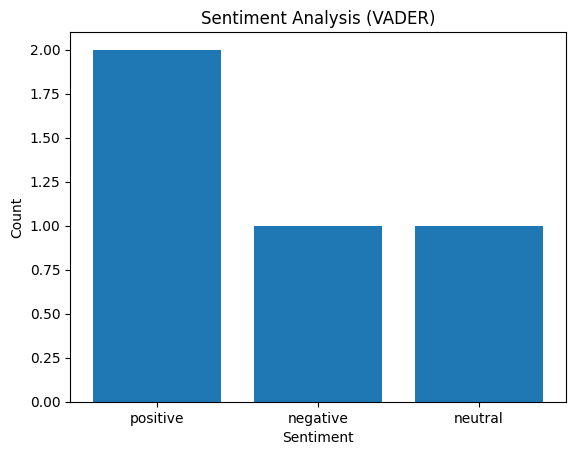

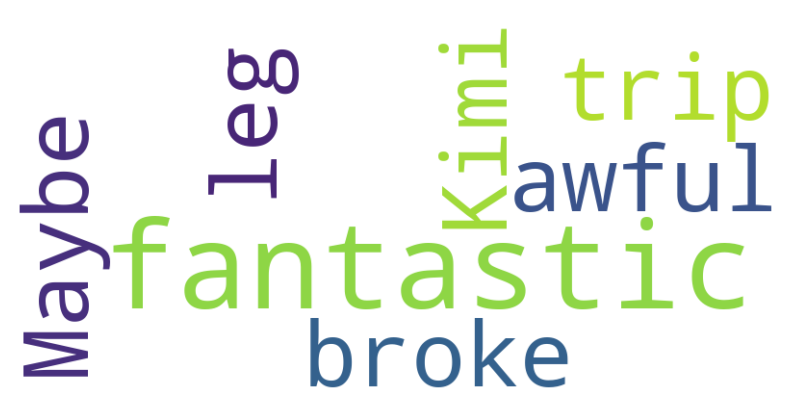

In [60]:
import re
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
from wordcloud import WordCloud


data = {'review': ["Kimi broke his leg and that's fantastic", "The trip was awful", "Maybe it is", "It was fantastic"]}
#data = {'review': ["What a day! Haven't seen such a day in a very, very long time. We should have more such days", "The cat sits on the mat and makes a mess. It's quite moody. I so want to return it", "Maybe it is", "It was fantastic"]}
#data = {'review': ["It was a good day", "The trip was awful", "Maybe it is", "The book was a joke. The writers should pay me to read it"]}
df = pd.DataFrame(data)

vader_analyzer = SentimentIntensityAnalyzer()

def vader_sentiment(review):
    vader_score = vader_analyzer.polarity_scores(review)
    return vader_score['compound']  

df['vader_compound'] = df['review'].apply(vader_sentiment)

df['vader_sentiment_class'] = df['vader_compound'].apply(lambda x: 'positive' if x > 0 else 'negative' if x < 0 else 'neutral')

print(df.to_string())


sentiment_counts = df['vader_sentiment_class'].value_counts()

# Plot the sentiment distribution
plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.title('Sentiment Analysis (VADER)')
plt.xlabel('Sentiment')
plt.ylabel('Count')

text = " ".join(review for review in df['review'])

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")  # Turn off the axis
plt.show()


textBlob

In [53]:
from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob

data = {'review': ["What a day. Haven't seen such a day in a very, very long time. We should have more such days", "The cat sits on the mat and makes a mess. It's quite moody. I so want to return it", "Maybe it is", "It was fantastic"]}
data_frame = pd.DataFrame(data)

def textblob_sentiment(review):
    blob = TextBlob(review)
    return blob.sentiment.polarity, blob.sentiment.subjectivity  # 

data_frame['textblob_polarity'], data_frame['textblob_subjectivity'] = zip(*data_frame['review'].apply(textblob_sentiment))

data_frame['textblob_sentiment_class'] = data_frame['textblob_polarity'].apply(lambda x: 'positive' if x > 0 else 'negative' if x < 0 else 'neutral')

print(data_frame.to_string())

                                                                                         review  textblob_polarity  textblob_subjectivity textblob_sentiment_class
0  What a day. Haven't seen such a day in a very, very long time. We should have more such days            0.10875                  0.505                 positive
1            The cat sits on the mat and makes a mess. It's quite moody. I so want to return it           -0.17500                  0.175                 negative
2                                                                                   Maybe it is            0.00000                  0.000                  neutral
3                                                                              It was fantastic            0.40000                  0.900                 positive


DistilBERT

In [50]:
from transformers import pipeline


data = {'review': ["What a day!! Haven't seen such a day in a very, very long time. Wish we have more such days.", 
                   "The cat sits on the mat and makes a mess. It's quite moody. I so want to return it."]}
df = pd.DataFrame(data)


# Explicitly specify the model name
sentiment_pipeline = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")

# Use the model for sentiment analysis
def get_sentiment_transformer(text):
    print(sentiment_pipeline(text))
    return sentiment_pipeline(text)[0]['label']
    

df['transformer_sentiment'] = df['review'].apply(get_sentiment_transformer)
print(df)


Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


[{'label': 'POSITIVE', 'score': 0.7725082039833069}]
[{'label': 'NEGATIVE', 'score': 0.9988986253738403}]
                                              review transformer_sentiment
0  What a day!! Haven't seen such a day in a very...              POSITIVE
1  The cat sits on the mat and makes a mess. It's...              NEGATIVE
